## Due Data: Dec. 1st

# Assignment 5

In this assignment, you are required to pick 2 machine learning models of your choice and then apply it to model the credit risk using `German Credit Risk`data. Do not forget to explain/interpret the steps you follow.

In [1]:
#import basic packages/libraries
import pandas as pd
import numpy as np

In [2]:
#read in csv 
df = pd.read_csv('credit_data_risk.csv')

#### Exploratory data analysis


In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
del df['Unnamed: 0']

In [5]:
df.shape

(1000, 10)

In [6]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [8]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

#### Clustering
#### Type of unsupervised learning.
#### K-Means is a type of clustering method that groups similar data points together.

In [9]:
import matplotlib.pyplot as plt
numerical_df = df.select_dtypes(exclude='O')

In [10]:
numerical_df.head()

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24


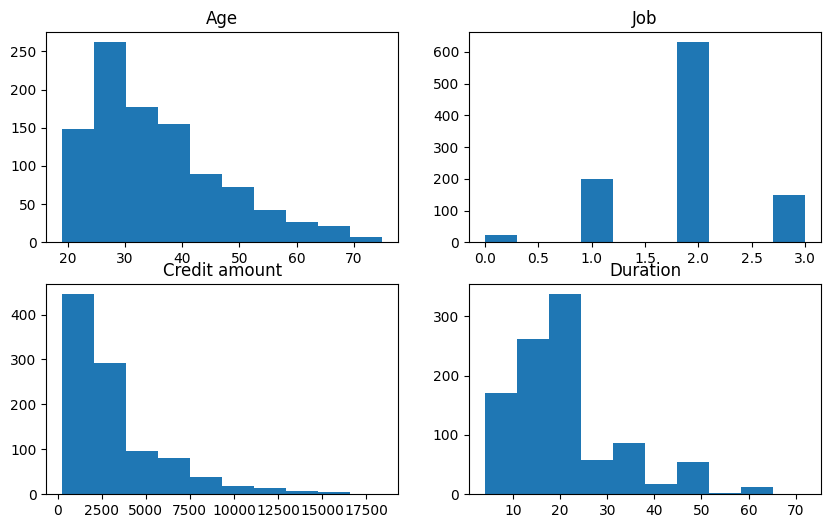

In [11]:
plt.figure(figsize=(10, 6))
k = 0
for i, j in enumerate(numerical_df):
    k+=1
    plt.subplot(2,2,k)
    plt.hist(numerical_df.iloc[:,i])
    plt.title(str(j))

In [12]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1000 non-null   int64
 1   Job            1000 non-null   int64
 2   Credit amount  1000 non-null   int64
 3   Duration       1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_df)

In [15]:
distance = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    distance.append(kmeans.inertia_)

#### Elbowing
#### Method that finds the optimal number of clusters.
#### Watch the slope of the curve and decide the cut-off point at which the curve plateaus.

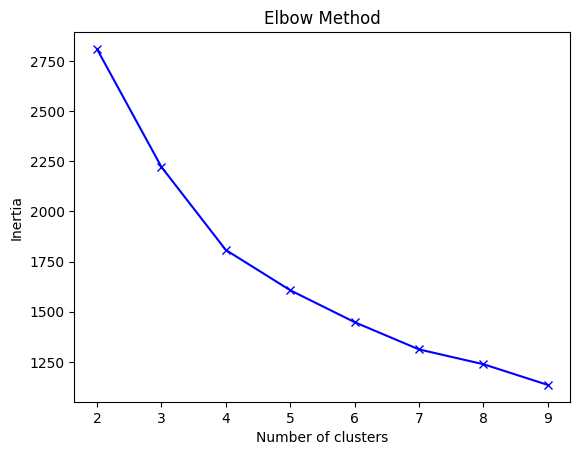

In [16]:
no_cluster = range(2, 10)
plt.plot(no_cluster, distance, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#### Try 2 Clusters

In [17]:
kmeans = KMeans(n_clusters=2)
cluster = kmeans.fit_predict(scaled_df)
df['clusters'] = pd.DataFrame(kmeans.labels_)

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,clusters
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,53,male,2,free,little,little,4870,24,car,bad,0


In [18]:
df_scaled = pd.DataFrame(scaled_df)
df_scaled['clusters'] = df['clusters']

df_scaled['Risk'] = df['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit Amount', 'Duration', 'Clusters', 'Risk']

df_scaled.head()

,Age,Job,Credit Amount,Duration,Clusters,Risk
0,2.766456,0.146949,-0.745131,-1.236478,0,good
1,-1.191404,0.146949,0.949817,2.248194,1,bad
2,1.183312,-1.383771,-0.416562,-0.738668,0,good
3,0.831502,0.146949,1.634247,1.750384,1,good
4,1.535122,0.146949,0.566664,0.256953,0,bad


#### First cluster has a class imbalance, while the second cluster is pretty even. 

In [19]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()

good    573
bad     193
Name: Risk, dtype: int64

In [20]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()

good    127
bad     107
Name: Risk, dtype: int64

<AxesSubplot: title={'center': 'Frequency of Risk Level'}>

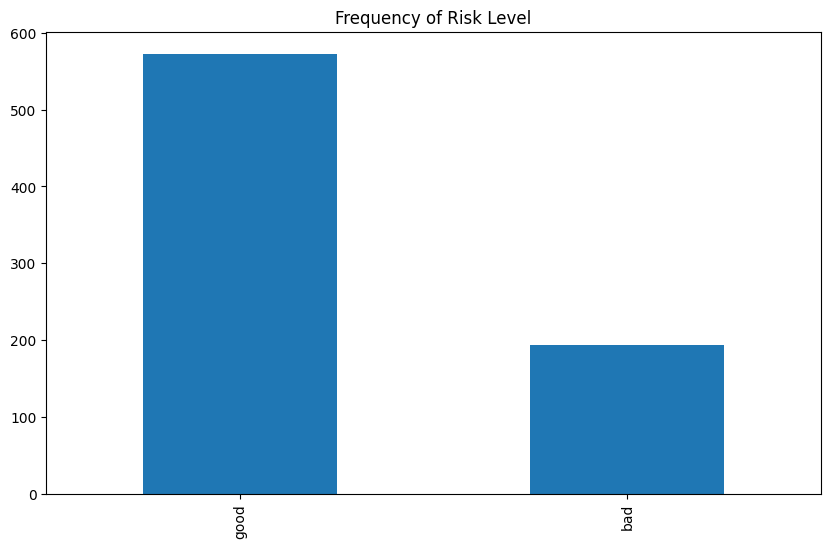

In [21]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts().\
plot(kind='bar',figsize=(10, 6),title='Frequency of Risk Level')

<AxesSubplot: title={'center': 'Frequency of Risk Level'}>

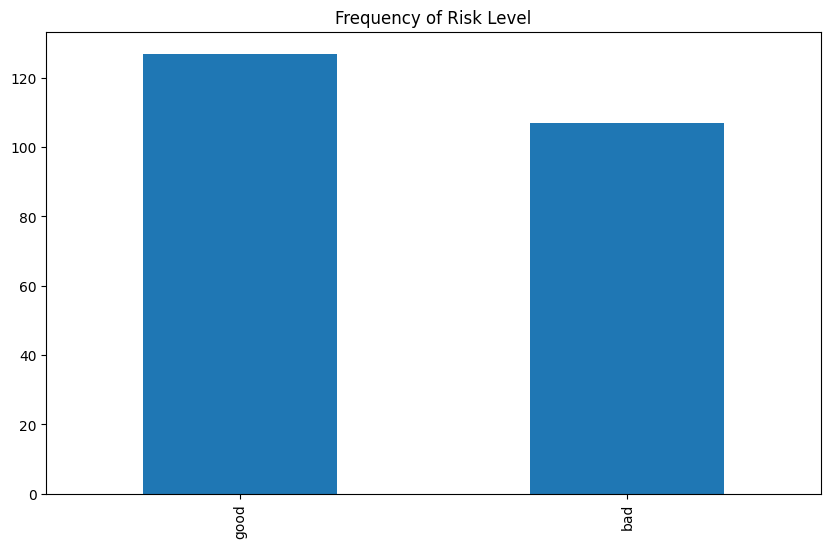

In [22]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts().\
plot(kind='bar',figsize=(10, 6),title='Frequency of Risk Level')

In [23]:
#0 is good, 1 is bad
df['clusters'].value_counts()

0    766
1    234
Name: clusters, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good':0, 'bad':1})

In [26]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,['Risk','Clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,Age,Job,Credit Amount,Duration,Clusters
29,2.414647,0.146949,1.263499,3.243815,1
535,-0.223927,0.146949,-0.337522,0.008048,0
695,1.271265,0.146949,-0.721384,-1.236478,0
557,-0.575737,0.146949,0.613804,0.008048,0
836,-1.279356,0.146949,-0.845439,-0.738668,0
...,...,...,...,...,...
106,0.303788,1.677670,1.129520,-0.240857,1
270,-0.311879,0.146949,-0.215947,-0.240857,0
860,-0.751642,0.146949,0.897714,0.256953,1
435,-0.927547,0.146949,-0.633482,-0.738668,0


In [28]:
first_cluster_train = X_train[X_train.Clusters==0].iloc[:,:-1]
second_cluster_train = X_train[X_train.Clusters==1].iloc[:,:-1]

#### Logistic Regression for PD Estimation

In [29]:
!pip3 install statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
!pip3 install imblearn
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score, roc_curve

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [30]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters==0]['Risk']

In [31]:
smote = SMOTEENN(random_state=2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
logit_fit1.summary()

Optimization terminated successfully.
         Current function value: 0.444792
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  371
Model:                          Logit   Df Residuals:                      367
Method:                           MLE   Df Model:                            3
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.3546
Time:                        08:19:23   Log-Likelihood:                -165.02
converged:                       True   LL-Null:                       -255.69
Covariance Type:            nonrobust   LLR p-value:                 4.529e-39
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -1.6110      0.189     -8.542      0.000      -1.981      -1.241
Job              -0.5059      0.171     -2.965      0.003      -0.840      -0.172
Credit Amount    -1.4992      0.317     -4.737      0.000      -2.120      -0.879
Duration          1.6819      0.275      6.111      0.000       1.142       2.221
=================================================================================
"""

#### Prediction analysis
#### Each cluster is a different dataset.

In [32]:
first_cluster_test = X_test[X_test.Clusters==0].iloc[:,:-1]
second_cluster_test = X_test[X_test.Clusters==1].iloc[:,:-1]

In [33]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters==0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

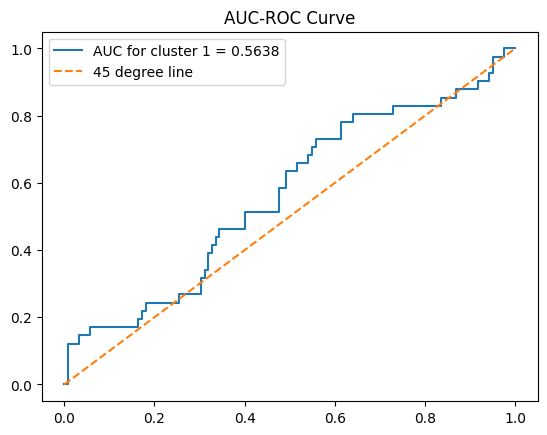

In [34]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos, true_pos, label='AUC for cluster 1 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()

#### Repeat with the second cluster.

In [35]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters==1]['Risk']

In [36]:
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
logit_fit2.summary()

Optimization terminated successfully.
         Current function value: 0.688460
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  197
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                            3
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:               4.240e-05
Time:                        08:19:24   Log-Likelihood:                -135.63
converged:                       True   LL-Null:                       -135.63
Covariance Type:            nonrobust   LLR p-value:                    0.9997
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.0287      0.147     -0.196      0.845      -0.316       0.259
Job              -0.1523      0.151     -1.012      0.312      -0.447       0.143
Credit Amount     0.1048      0.115      0.908      0.364      -0.121       0.331
Duration         -0.0956      0.126     -0.759      0.448      -0.342       0.151
=================================================================================
"""

In [37]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters==1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

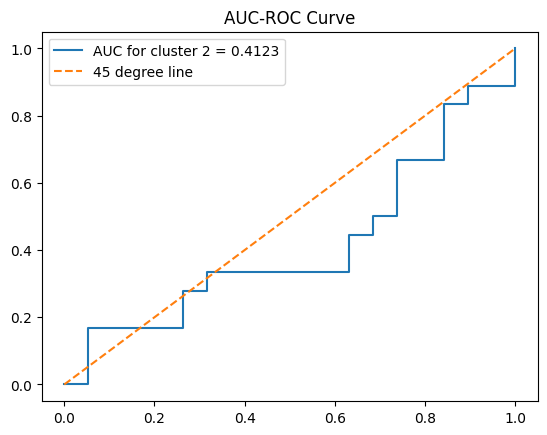

In [38]:
false_pos, true_pos, _ = roc_curve(y_test2.values, pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos, true_pos, label='AUC for cluster 2 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()

#### AUC value of cluster 1 is slightly higher than cluster 2, which means predictions from cluster 1 should be slightly more accurate than those from cluster 2.

#### SVC for PD Estimation

In [39]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [40]:
param_svc = {'gamma':[1e-6, 1e-2],
            'C': [0.001, 0.09, 1, 5, 10],
            'kernel':('linear','rbf')}

In [41]:
svc = SVC(class_weight='balanced')
halve_svc = HalvingRandomSearchCV(svc, param_svc, scoring='roc_auc', n_jobs=-1)
halve_svc.fit(X_train1, y_train1)
print('best hyperparameters for the first cluster in SVC {} with {}'.
      format(halve_svc.best_score_, halve_svc.best_params_))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 571, in roc_auc_score
    return _average_binary_score(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average

In [42]:
halve_svc = SVC(kernel= 'rbf', gamma= 0.01, C= 10)
halve_svc.fit(X_train1, y_train1)

SVC(C=10, gamma=0.01)

In [43]:
y_pred_SVC_1 = halve_svc.predict(X_test1)
roc_auc_score(y_test1, y_pred_SVC_1)

0.5709716113554578

In [44]:
param_svc = {'gamma':[1e-6, 1e-2],
            'C': [0.001, 0.09, 1, 5, 10],
            'kernel':('linear','rbf')}

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
svc = SVC(class_weight='balanced')
halve_svc = HalvingRandomSearchCV(svc, param_svc, scoring='roc_auc', n_jobs=-1)
halve_svc.fit(X_train2, y_train2)
print('best hyperparameters for the first cluster in SVC {} with {}'.
      format(halve_svc.best_score_, halve_svc.best_params_))

best hyperparameters for the first cluster in SVC 0.5469441328188196 with {'kernel': 'rbf', 'gamma': 1e-06, 'C': 5}


In [47]:
halve_svc = SVC(kernel= 'linear', gamma= 1e-06, C= 1)
halve_svc.fit(X_train2, y_train2)

SVC(C=1, gamma=1e-06, kernel='linear')

In [48]:
y_pred_SVC_2 = halve_svc.predict(X_test2)
roc_auc_score(y_test2, y_pred_SVC_2)

0.5292397660818714

#### Even for SVC, the AUC score for cluster 1 is slightly better than that of cluster 2.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=259c845c-ff28-47b8-a924-09d9ca301a5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>